In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
file_path = r"C:\Users\hp\Downloads\archive (20)\twitter_training.csv"
df = pd.read_csv(file_path, header=None, names=['ID', 'Entity', 'Sentiment', 'Content'])
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
print("Dataset shape:", df.shape)
print("\nUnique Sentiments:", df['Sentiment'].unique())
df['Sentiment'].value_counts()


Dataset shape: (74682, 4)

Unique Sentiments: ['Positive' 'Neutral' 'Negative' 'Irrelevant']


Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

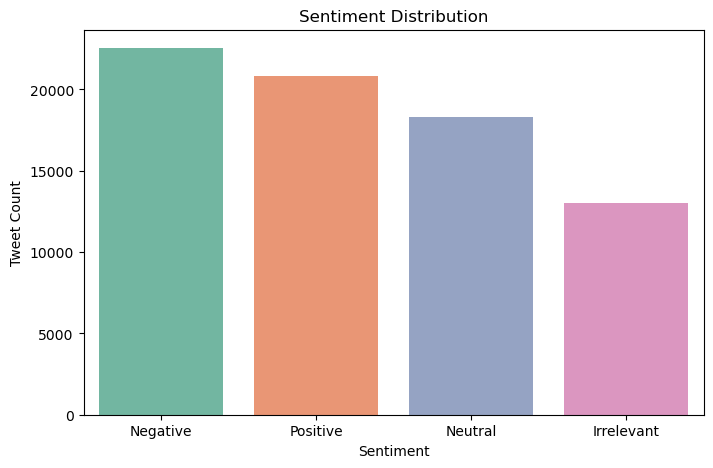

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()



In [6]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@[\w]*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Content'] = df['Content'].astype(str).apply(clean_text)
df[['Content', 'Cleaned_Content']].head()


,Content,Cleaned_Content
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder


In [14]:
def get_common_words(sentiment, n=10):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Content'])
    words = text.split()
    most_common = Counter(words).most_common(n)
    return pd.DataFrame(most_common, columns=['Word', 'Frequency'])

for sentiment in sentiments:
    print(f"\nMost Common Words for {sentiment}:")
    display(get_common_words(sentiment))



Most Common Words for Positive:


,Word,Frequency
0,game,2274
1,love,1777
2,im,1770
3,good,1614
4,like,1359
5,really,1290
6,2,1280
7,new,1199
8,best,1112
9,one,1058



Most Common Words for Neutral:


,Word,Frequency
0,johnson,1766
1,2,1339
2,game,1229
3,amazon,1081
4,like,909
5,im,891
6,get,886
7,one,857
8,new,850
9,facebook,823



Most Common Words for Negative:


,Word,Frequency
0,game,3768
1,get,1662
2,like,1620
3,shit,1516
4,im,1425
5,fix,1313
6,fuck,1259
7,cant,1226
8,play,1209
9,dont,1127



Most Common Words for Irrelevant:


,Word,Frequency
0,like,992
1,see,943
2,player,878
3,im,856
4,game,793
5,people,764
6,ban,739
7,love,670
8,one,663
9,good,663


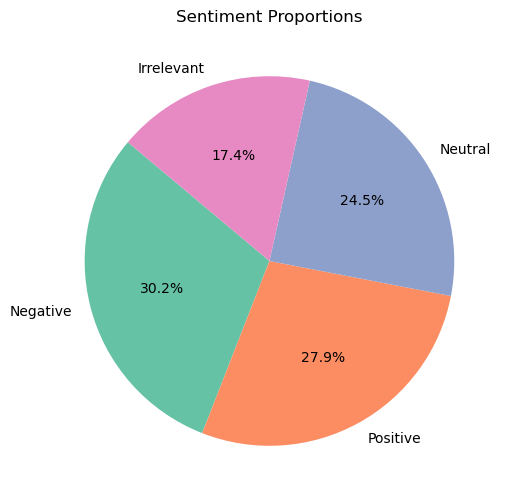

In [15]:
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Sentiment Proportions')
plt.ylabel('')
plt.show()
